In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [8]:
ball_positions = [x.get(1, []) for x in ball_positions] # get the ball positions from the ball detections
df_ball_positions = pd.DataFrame(ball_positions, columns=["x1", "y1", "x2", "y2"]) # create a dataframe from the ball positions
df_ball_positions = df_ball_positions.interpolate() # interpolate the missing ball positions
df_ball_positions = df_ball_positions.bfill() # backfill the missing ball positions at beginning of the video

In [9]:
df_ball_positions['middle_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2 # calculate the middle y position of the ball
df_ball_positions['middle_y_rolling_mean'] = df_ball_positions['middle_y'].rolling(window=5, min_periods=1, center=False).mean() # calculate the rolling mean of the middle y position of the ball
df_ball_positions['delta_y'] = df_ball_positions['middle_y_rolling_mean'].diff() # calculate the difference between the rolling mean of the middle y position of the ball

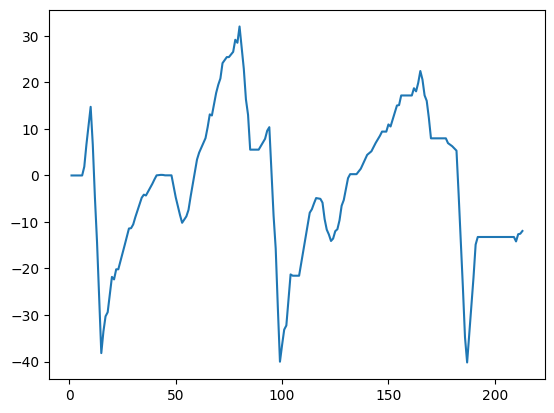

In [17]:
plt.plot(df_ball_positions['delta_y'], label='Middle y position of the ball')

In [23]:
df_ball_positions['ball_hit'] = 0
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_postion_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_postion_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_postion_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_postion_change and positive_postion_change_following_frame:
                change_count += 1
        
        if change_count >= minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

hit_frame_numbers = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

C:\Users\AndrewNewson\AppData\Local\Temp\ipykernel_18988\3763617953.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\AndrewNewson\AppData\Local\Temp\ipykernel_18988\3763617953.py:19: Set